In [1]:
from Bio import AlignIO, SeqIO
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio import codonalign
from Bio.Alphabet import generic_dna, Gapped, IUPAC
from skbio.stats.distance import DistanceMatrix
from Bio.Data.CodonTable import generic_by_id
from Bio.Alphabet import Gapped,IUPAC
from Bio.codonalign.codonalphabet import get_codon_alphabet
from Bio.codonalign.codonseq import cal_dn_ds
import pandas as pd
import itertools
# %load_ext rpy2.ipython
path_to_files='../mauve_alignments/fna/'
path_out="/home/maeperez/projects/def-bacc/maeperez/Clams/VesicSymb_Evolution/dowstream_analyses_and_data/"


/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:27: BiopythonExperimentalWarning: Bio.codonalign is an experimental module which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)
/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


In [2]:
### Get list of genes to concat
with open(path_to_files+'filelist_nopseudo_638','r') as f:
    lines=[file[8:-4] for file in f.read().splitlines()]
print(len(lines))

with open(path_out+'core_genes_with_recomb_AICc.txt','r') as f:
    recomb=[file for file in f.read().splitlines()]
    
print(len(recomb))
print(recomb[:3])
lines=[line for line in lines if line not in recomb]
print(len(lines))
print(lines[:5])

638
83
['Rmag_0009', 'Rmag_0015', 'Rmag_0018']
555
['Rmag_0001', 'Rmag_0002', 'Rmag_0003', 'Rmag_0005', 'Rmag_0006']


In [ ]:
#### Concatenate core genes for symb and mito

dic_sym={}
for gene in [lines[0]]:
    cat_aln_symb=AlignIO.read(path_to_files+'aligned_'+gene+'.fna','fasta')
    for i in range(len(cat_aln_symb)):
        cat_aln_symb[i].id=cat_aln_symb[i].id.split('|')[0]
        dic_sym[i]=cat_aln_symb[i].id
    
for gene in lines[1:]:
    new_aln=AlignIO.read(path_to_files+'aligned_'+gene+'.fna','fasta')
    for i in range(len(cat_aln_symb)):
        new_aln[i].id=new_aln[i].id.split('|')[0]
    cat_aln_symb+=new_aln
print(cat_aln_symb)

dic_sym[0]='X.Bathy'
dic_sym[8]='X.SUP05'

for k,v in dic_sym.items():
    dic_sym[k]=v.split('.')[1] 
print(dic_sym) 

with open(path_to_files+'filelist_withpseudo_702-716','r') as f:
    lines=[file[:-4] for file in f.read().splitlines()]
print(len(lines))

In [29]:
genomesnamesfix={'MK948426':'C.marissinica','MT528632.1':'C.fausta','P.okutanii_ref':'P.okutanii',"B.thermophilus":"X.Bathy"}

dic_mito={}
for gene in [lines[702]]:
    cat_aln_mito=AlignIO.read(path_to_files+gene+'.fna','fasta')
    for i in range(len(cat_aln_mito)):
        cat_aln_mito[i].id=cat_aln_mito[i].id.split('|')[0]
        dic_mito[i]=cat_aln_mito[i].id
print(dic_mito)    
for gene in lines[703:-1]:
    new_aln=AlignIO.read(path_to_files+gene+'.fna','fasta')
    for i in range(len(cat_aln_mito)):
        new_aln[i].id=new_aln[i].id.split('|')[0]
    cat_aln_mito+=new_aln
print(cat_aln_mito)

print(dic_mito)    
for i in range(len(cat_aln_mito)):
    if cat_aln_mito[i].id in genomesnamesfix.keys():
            cat_aln_mito[i].id=genomesnamesfix[cat_aln_mito[i].id]
            dic_mito[i]=cat_aln_mito[i].id
        
for k,v in dic_mito.items():
    dic_mito[k]=v.split('.')[1]    
print(dic_mito)    


{0: 'A.diagonalis', 1: 'A.gigas1', 2: 'A.gigas2', 3: 'A.mariana_ref', 4: 'A.phaseoliformis_ref', 5: 'A.phaseoliformis', 6: 'A.southwardae', 7: 'B.thermophilus', 8: 'C.magnifica', 9: 'C.pacifica', 10: 'C.rectimargo', 11: 'MK948426', 12: 'MT528632.1', 13: 'P.extenta', 14: 'P.okutanii_ref', 15: 'P.soyoae1', 16: 'P.soyoae2', 17: 'X.pliocardia'}
SingleLetterAlphabet() alignment with 18 rows and 12858 columns
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTT---ATAGG...--- A.diagonalis
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTT---ATGGG...--- A.gigas1
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTT---ATGGG...--- A.gigas2
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTT---ATAGG...--- A.mariana_ref
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTT---ATAGG...--- A.phaseoliformis_ref
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTT---ATAGG...--- A.phaseoliformis
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTT---ATAGG...--- A.southwardae
ATGATATTGGATTTGTTATCTAGTTTTGATTCATATAGTATAAG...GTA B.thermophilus
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTT---ATAGG...--- C.magnifica
ATGGTTAGGG

In [30]:
print(set(dic_mito.values()),
    set(dic_sym.values()))

{'pliocardia', 'phaseoliformis', 'Bathy', 'okutanii', 'phaseoliformis_ref', 'marissinica', 'pacifica', 'diagonalis', 'fausta', 'magnifica', 'mariana_ref', 'extenta', 'southwardae', 'soyoae1', 'gigas2', 'soyoae2', 'gigas1', 'rectimargo'} {'pliocardia', 'phaseoliformis', 'Bathy', 'okutanii', 'fausta', 'marissinica', 'pacifica', 'diagonalis', 'extenta', 'magnifica', 'southwardae', 'soyoae1', 'SUP05', 'gigas2', 'soyoae2', 'gigas1', 'rectimargo'}


# Distance with method ML

## Mito

In [31]:
### Init codon table

table5=generic_by_id[5]
table5.nucleotide_alphabet=IUPAC.ambiguous_dna
table5.protein_alphabet=IUPAC.extended_protein
print(table5)

table5.forward_table['AAN'] = "K"
table5.forward_table['GAY'] = "D"
table5.forward_table['YTA'] = "L"
table5.forward_table['ATY'] = "I"
table5.forward_table['TCY'] = "S"
table5.forward_table['GTY'] = "V"
table5.forward_table['GGY'] = "G"
table5.forward_table['CCY'] = "P"
table5.forward_table['GGR'] = "G"
table5.forward_table['AYA'] = "X"
table5.forward_table['NTA'] = "X"
table5.forward_table['ANA'] = "X"
table5.forward_table['ATN'] = "X"
table5.forward_table['ANN'] = "X"
table5.forward_table['NNN'] = "X"
table5.forward_table['NNA'] = "X"
table5.forward_table['NNG'] = "X"
table5.forward_table['GNN'] = "X"
table5.forward_table['NTG'] = "X"
table5.forward_table['GGN'] = "G"
table5.forward_table['TCN'] = "S"
t5=get_codon_alphabet(table5, gap_char="-")
t5.letters+=['AAN','GAY','YTA','ATY','TCY','GTY','GGY','CCY','GGR','AYA','NTA','ANA','ATN','ANN','NNN','NNA','NNG','GNN','NTG','GGN','TCN']
print(t5)

### Get core_mitoch

align=cat_aln_mito
codon_aln=codonalign.CodonAlignment.from_msa(align,alphabet=t5)

### get dnds

print(table5)
mat=codon_aln.get_dn_ds_matrix(method="ML",codon_table=table5)
dN=DistanceMatrix(mat[0]).condensed_form()
dS=DistanceMatrix(mat[1]).condensed_form()
dNdS=dN/dS

### Create df

ids=['-'.join(sorted([dic_mito[comb[0]],dic_mito[comb[1]]])) for comb in itertools.combinations(range(len(cat_aln_mito)), 2)]
df_mitoch=pd.DataFrame({'dnds_mito':dNdS,'ds_mito':dS, 'dn_mito': dN}, index=ids)
df_mitoch

Table 5 Invertebrate Mitochondrial, SGC4

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA S   | A
A | ATG M(s)| ACG T   | AAG K   | AGG S   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G 

,dnds_mito,ds_mito,dn_mito
diagonalis-gigas1,0.059275,0.500990,0.029696
diagonalis-gigas2,0.053218,0.382336,0.020347
diagonalis-mariana_ref,0.020079,2.615905,0.052525
diagonalis-phaseoliformis_ref,0.030178,1.701903,0.051360
diagonalis-phaseoliformis,0.020342,2.592601,0.052739
...,...,...,...
okutanii-soyoae2,0.054267,0.104049,0.005646
okutanii-pliocardia,0.018485,3.075024,0.056843
soyoae1-soyoae2,5.406876,0.000018,0.000097
pliocardia-soyoae1,0.018125,3.106682,0.056309


## Symbiont

In [6]:
### init codon table

table11=generic_by_id[11]
table11.nucleotide_alphabet=IUPAC.ambiguous_dna
table11.protein_alphabet=IUPAC.extended_protein
print(table11)

t11=get_codon_alphabet(table11, gap_char="-")

### get core_symb

align=cat_aln_symb
codon_aln=codonalign.CodonAlignment.from_msa(align,alphabet=t11)

### get dnds

mat=codon_aln.get_dn_ds_matrix(method="ML",codon_table=table11)
dN=DistanceMatrix(mat[0]).condensed_form()
dS=DistanceMatrix(mat[1]).condensed_form()
dNdS=dN/dS

### Create df
ids=['-'.join(sorted([dic_sym[comb[0]],dic_sym[comb[1]]])) for comb in itertools.combinations(range(len(cat_aln_symb)), 2)]
df_sym=pd.DataFrame({'dnds_symb':dNdS,'ds_symb':dS, 'dn_symb': dN}, index=ids)
df_sym

Table 11 Bacterial, Archaeal, Plant Plastid

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA I(s)| ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG

,dnds_symb,ds_symb,dn_symb
Bathy-fausta,0.065253,2.288276,1.493174e-01
Bathy-magnifica,0.060085,2.587164,1.554509e-01
Bathy-pacifica,0.064740,2.319867,1.501872e-01
Bathy-phaseoliformis,0.067677,2.140048,1.448313e-01
Bathy-pliocardia,0.066257,2.229507,1.477200e-01
...,...,...,...
marissinica-soyoae1,0.110072,0.183640,2.021375e-02
marissinica-soyoae2,0.109628,0.183757,2.014491e-02
okutanii-soyoae1,0.105803,0.088610,9.375260e-03
okutanii-soyoae2,0.104923,0.088769,9.313838e-03


In [32]:
## Merge symb and mitoch tables 

df=pd.merge(df_mitoch,df_sym,how='outer',left_index=True, right_index=True)
df

,dnds_mito,ds_mito,dn_mito,dnds_symb,ds_symb,dn_symb
Bathy-SUP05,NaN,NaN,NaN,0.055540,2.698480,1.498745e-01
Bathy-diagonalis,0.208340,8.022953,1.671502,0.027070,6.155650,1.666306e-01
Bathy-extenta,0.197774,8.282004,1.637965,0.026796,6.205625,1.662869e-01
Bathy-fausta,0.056422,12.285147,0.693156,0.065253,2.288276,1.493174e-01
Bathy-gigas1,0.019430,31.014829,0.602619,0.029264,5.758091,1.685039e-01
...,...,...,...,...,...,...
rectimargo-soyoae1,0.027006,2.240516,0.060506,0.097050,0.843776,8.188832e-02
rectimargo-soyoae2,0.027087,2.234493,0.060526,0.095979,0.847132,8.130671e-02
southwardae-soyoae1,0.029564,1.568854,0.046382,0.080489,1.021355,8.220734e-02
southwardae-soyoae2,0.029175,1.605606,0.046843,0.080290,1.022355,8.208509e-02


In [33]:
## Add info group
print(sorted(list(set(list(dic_mito.values())+list(dic_sym.values())))))

dic_group=dict(zip(sorted(list(set(list(dic_mito.values())+list(dic_sym.values())))),['F','F','V','V','R','V','V','R','V','V','V','R','R','R','R','R','R','V','V']))


df['Groups']=['-'.join(sorted([dic_group[i.split('-')[0]], dic_group[i.split('-')[1]]])) for i in df.index.values]
df

['Bathy', 'SUP05', 'diagonalis', 'extenta', 'fausta', 'gigas1', 'gigas2', 'magnifica', 'mariana_ref', 'marissinica', 'okutanii', 'pacifica', 'phaseoliformis', 'phaseoliformis_ref', 'pliocardia', 'rectimargo', 'southwardae', 'soyoae1', 'soyoae2']


,dnds_mito,ds_mito,dn_mito,dnds_symb,ds_symb,dn_symb,Groups
Bathy-SUP05,NaN,NaN,NaN,0.055540,2.698480,1.498745e-01,F-F
Bathy-diagonalis,0.208340,8.022953,1.671502,0.027070,6.155650,1.666306e-01,F-V
Bathy-extenta,0.197774,8.282004,1.637965,0.026796,6.205625,1.662869e-01,F-V
Bathy-fausta,0.056422,12.285147,0.693156,0.065253,2.288276,1.493174e-01,F-R
Bathy-gigas1,0.019430,31.014829,0.602619,0.029264,5.758091,1.685039e-01,F-V
...,...,...,...,...,...,...,...
rectimargo-soyoae1,0.027006,2.240516,0.060506,0.097050,0.843776,8.188832e-02,R-V
rectimargo-soyoae2,0.027087,2.234493,0.060526,0.095979,0.847132,8.130671e-02,R-V
southwardae-soyoae1,0.029564,1.568854,0.046382,0.080489,1.021355,8.220734e-02,R-V
southwardae-soyoae2,0.029175,1.605606,0.046843,0.080290,1.022355,8.208509e-02,R-V


In [34]:
df.to_csv(path_out+'dsNuclMito_results.txt',header=True,index=True,sep='\t')

Text(0.5, 1.0, 'ds mitoch_vs_nucl')

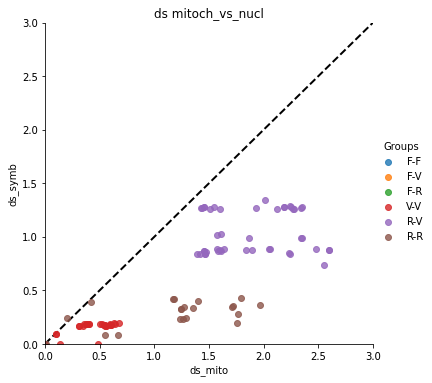

In [35]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
# Create scatter plot
sns.lmplot(x='ds_mito', y='ds_symb',hue='Groups',fit_reg=False,data=df)

# add trend line
xmin,xmax=0,3
ymin,ymax=0,3
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('ds mitoch_vs_nucl')

# Get transitions and transversions for testing saturation

In [36]:


a=SeqRecord(Seq('CT-GTACGT', Gapped(IUPAC.ambiguous_dna)), id="Alpha")
b=SeqRecord(Seq('CGAATGYCN', Gapped(IUPAC.ambiguous_dna)), id="Beta")
c=SeqRecord(Seq('TTTATGNCN', Gapped(IUPAC.ambiguous_dna)), id="Gamma")
test_aln=MultipleSeqAlignment([a,b,c])
dic={0:'Alpha',
    1:'Beta',
    2:'Gamma'}
print(test_aln)

def get_pairwise_tstv_counts(aln,dic):
    from itertools import combinations,permutations
    import pandas as pd
    from collections import Counter
    from itertools import combinations,permutations
    ## get dictionnaries
    alphabet=['A','T','G','C','-','N','Y','R']
    chem={'A':'pur','T':'pyr','G':'pur','C':'pyr','Y':'pyr','R':'pur'}
    trs={}
    for item in permutations(alphabet,2):
        if item[0]==item[1]:
            continue
        elif '-' in item:
            continue
        elif 'N' in item:
            continue
        elif chem[item[0]]==chem[item[1]]:
            trs[item]='transition'
        else:
            trs[item]='transversion'
    
    ## iter through alignment
    ids=['-'.join(sorted([dic[comb[0]],dic[comb[1]]])) for comb in itertools.combinations(range(len(aln)), 2)]
    tstv=pd.DataFrame(0,columns=['transition','transversion'], index=ids)
    for (i,j) in combinations(range(len(aln)),2):
        idx='-'.join(map(str,sorted([dic[i],dic[j]])))
        pair_counts=Counter(zip(aln[i].seq,aln[j].seq))
        for pair in pair_counts.keys():
            if pair not in trs.keys():
                continue
            else:
                tstv[trs[pair]][idx]+=pair_counts[pair]
    return(tstv)
print(get_pairwise_tstv_counts(test_aln,dic))

IUPACAmbiguousDNA() alignment with 3 rows and 9 columns
CT-GTACGT Alpha
CGAATGYCN Beta
TTTATGNCN Gamma
             transition  transversion
Alpha-Beta            3             2
Alpha-Gamma           3             1
Beta-Gamma            1             2


In [37]:
mito_tstv=get_pairwise_tstv_counts(cat_aln_mito,dic_mito)
mito_tstv

symb_tstv=get_pairwise_tstv_counts(cat_aln_symb,dic_sym)
symb_tstv

tstv=pd.merge(mito_tstv,symb_tstv,how='outer',left_index=True, right_index=True,suffixes=['_mito','_symb'])
print(len(tstv),len(tstv.dropna()))
tstv

169 120


,transition_mito,transversion_mito,transition_symb,transversion_symb
Bathy-SUP05,NaN,NaN,73878.0,69032.0
Bathy-diagonalis,1758.0,3434.0,77467.0,67174.0
Bathy-extenta,1751.0,3446.0,77453.0,67176.0
Bathy-fausta,1693.0,3450.0,74698.0,62635.0
Bathy-gigas1,1571.0,3019.0,77628.0,67134.0
...,...,...,...,...
rectimargo-soyoae1,1357.0,590.0,62952.0,19555.0
rectimargo-soyoae2,1356.0,590.0,62825.0,19482.0
southwardae-soyoae1,1236.0,515.0,62100.0,19644.0
southwardae-soyoae2,1237.0,515.0,61933.0,19574.0


In [38]:
# ml_dnds=pd.read_csv(path_out+'dsNuclMito_results.txt',header=0,index_col=0,sep='\t')
# ml_dnds
ml_dnds=df.copy()

In [39]:
dnds=pd.merge(ml_dnds,tstv,how='outer',left_index=True, right_index=True)
print(len(dnds),len(dnds.dropna()))
dnds

169 120


,dnds_mito,ds_mito,dn_mito,dnds_symb,ds_symb,dn_symb,Groups,transition_mito,transversion_mito,transition_symb,transversion_symb
Bathy-SUP05,NaN,NaN,NaN,0.055540,2.698480,1.498745e-01,F-F,NaN,NaN,73878.0,69032.0
Bathy-diagonalis,0.208340,8.022953,1.671502,0.027070,6.155650,1.666306e-01,F-V,1758.0,3434.0,77467.0,67174.0
Bathy-extenta,0.197774,8.282004,1.637965,0.026796,6.205625,1.662869e-01,F-V,1751.0,3446.0,77453.0,67176.0
Bathy-fausta,0.056422,12.285147,0.693156,0.065253,2.288276,1.493174e-01,F-R,1693.0,3450.0,74698.0,62635.0
Bathy-gigas1,0.019430,31.014829,0.602619,0.029264,5.758091,1.685039e-01,F-V,1571.0,3019.0,77628.0,67134.0
...,...,...,...,...,...,...,...,...,...,...,...
rectimargo-soyoae1,0.027006,2.240516,0.060506,0.097050,0.843776,8.188832e-02,R-V,1357.0,590.0,62952.0,19555.0
rectimargo-soyoae2,0.027087,2.234493,0.060526,0.095979,0.847132,8.130671e-02,R-V,1356.0,590.0,62825.0,19482.0
southwardae-soyoae1,0.029564,1.568854,0.046382,0.080489,1.021355,8.220734e-02,R-V,1236.0,515.0,62100.0,19644.0
southwardae-soyoae2,0.029175,1.605606,0.046843,0.080290,1.022355,8.208509e-02,R-V,1237.0,515.0,61933.0,19574.0


In [48]:
SeqIO.write(cat_aln_mito,'cat_mitoch_genes.fasta','fasta')
SeqIO.write(cat_aln_symb,'cat_symb_genes.fasta','fasta')

17

In [43]:
import rpy2
%load_ext rpy2.ipython

ModuleNotFoundError: No module named 'rpy2'

In [40]:
%%R
library('ape')

### mito 
mito=read.dna('cat_mitoch_genes.fasta',format = 'fasta')
f84=dist.dna(mito, model = "F84", as.matrix = TRUE)
combi=combn(1:nrow(mito), 2)
list_f84=list()

for (n in 1: ncol(combi)){
  i=combi[1,n]
  j=combi[2,n]
  tmp=c(f84[i,j])
  names(tmp)=paste(i,j,sep='-')
  list_f84=append(list_f84, tmp)
}
mito_f84=as.data.frame(t(as.data.table(list_f84)))
dput(mito_f84)
dput(mito_f84$V1)
dput(rownames(mito_f84))

UsageError: Cell magic `%%R` not found.


In [ ]:
%%R
library('ape')

### symb 
symb=read.dna('cat_symb_genes.fasta',format = 'fasta')
f84=dist.dna(symb, model = "F84", as.matrix = TRUE)
combi=combn(1:nrow(symb), 2)
list_f84=list()

for (n in 1: ncol(combi)){
  i=combi[1,n]
  j=combi[2,n]
  tmp=c(f84[i,j])
  names(tmp)=paste(i,j,sep='-')
  list_f84=append(list_f84, tmp)
}
symb_f84=as.data.frame(t(as.data.table(list_f84)))
dput(symb_f84)
dput(symb_f84$V1)
dput(rownames(symb_f84))

In [95]:
mitof84=[0.0851192586913164, 0.0857425075467493, 0.176732692517136, 
0.178126112674871, 0.177190303461679, 0.175213411776226, 0.172670664643372, 
0.183819754735306, 0.193629412180421, 0.114976306111925, 0.193730233626902, 
0.107770332984865, 0.107935952414956, 0.106821541658455, 0.106700016710425, 
0.200648789575698, 0.00434092357899359, 0.173047186756557, 0.171493281897701, 
0.17056346496605, 0.171374717103558, 0.169892179451941, 0.180335478671812, 
0.185729071995023, 0.110493535597388, 0.186392684468843, 0.102525931641755, 
0.10011113228299, 0.0993212918220232, 0.0992020595888909, 0.192666991180064, 
0.173316093180989, 0.172031315153184, 0.17110145172474, 0.171365209585849, 
0.170305040432408, 0.180535736142227, 0.18596900391919, 0.110337855371337, 
0.186633222746813, 0.102007018117934, 0.0995712617627022, 0.0989011883979363, 
0.098781992848312, 0.192058041481833, 0.0349768146483458, 0.0344844303987954, 
0.033139722623481, 0.151303111803116, 0.143526991842762, 0.154945072185262, 
0.175585539638914, 0.155045214838118, 0.164322581128671, 0.172375735814664, 
0.172019372445269, 0.172157442981912, 0.156104536799053, 0.0106788441171049, 
0.0387685054958254, 0.152590020558161, 0.143726373396629, 0.155938677384026, 
0.175181144994928, 0.155245662050138, 0.165393835181505, 0.169500717303829, 
0.172061144770467, 0.172198974362883, 0.156094781582268, 0.0376485766946189, 
0.151583249467259, 0.143641410238131, 0.154601621312589, 0.174899413752193, 
0.154174781229741, 0.163997523428512, 0.169631164710661, 0.1722365567573, 
0.172098522903573, 0.15472898863256, 0.150166424044795, 0.140624184160405, 
0.151741135433194, 0.173734755443905, 0.151972564057599, 0.16470554547075, 
0.171276984108023, 0.16907367691701, 0.169210678558096, 0.154078064342556, 
0.161785661955348, 0.167446841176759, 0.172476187804533, 0.167446841176759, 
0.165044761431355, 0.167672914937825, 0.168446862437546, 0.168584892689108, 
0.167086980504382, 0.110247344884535, 0.185229447617383, 0.109688043230938, 
0.174956315558079, 0.177924310731329, 0.179740538217623, 0.179600517881223, 
0.17102313293718, 0.187016068303856, 0.00279375529327523, 0.182818838591949, 
0.185104008120913, 0.188699920565766, 0.188557886492424, 0.182144733088811, 
0.188105314417707, 0.0912158373585746, 0.0868625470959419, 0.0884172455060516, 
0.0885339940435218, 0.198968797440745, 0.183059481484932, 0.185345345889842, 
0.189226497781863, 0.189084322615343, 0.181833202978174, 0.080312911503294, 
0.0783695502144, 0.0782555261221479, 0.188873137852699, 0.0304096811796954, 
0.0303069048142159, 0.192624295913982, 9.60636993604426e-05, 
0.195154792384292, 0.195010601424461]

mitof84idx=["1-2", "1-3", "1-4", "1-5", "1-6", "1-7", "1-8", "1-9", "1-10", 
"1-11", "1-12", "1-13", "1-14", "1-15", "1-16", "1-17", "2-3", 
"2-4", "2-5", "2-6", "2-7", "2-8", "2-9", "2-10", "2-11", "2-12", 
"2-13", "2-14", "2-15", "2-16", "2-17", "3-4", "3-5", "3-6", 
"3-7", "3-8", "3-9", "3-10", "3-11", "3-12", "3-13", "3-14", 
"3-15", "3-16", "3-17", "4-5", "4-6", "4-7", "4-8", "4-9", "4-10", 
"4-11", "4-12", "4-13", "4-14", "4-15", "4-16", "4-17", "5-6", 
"5-7", "5-8", "5-9", "5-10", "5-11", "5-12", "5-13", "5-14", 
"5-15", "5-16", "5-17", "6-7", "6-8", "6-9", "6-10", "6-11", 
"6-12", "6-13", "6-14", "6-15", "6-16", "6-17", "7-8", "7-9", 
"7-10", "7-11", "7-12", "7-13", "7-14", "7-15", "7-16", "7-17", 
"8-9", "8-10", "8-11", "8-12", "8-13", "8-14", "8-15", "8-16", 
"8-17", "9-10", "9-11", "9-12", "9-13", "9-14", "9-15", "9-16", 
"9-17", "10-11", "10-12", "10-13", "10-14", "10-15", "10-16", 
"10-17", "11-12", "11-13", "11-14", "11-15", "11-16", "11-17", 
"12-13", "12-14", "12-15", "12-16", "12-17", "13-14", "13-15", 
"13-16", "13-17", "14-15", "14-16", "14-17", "15-16", "15-17", 
"16-17"]

mitof84idx=['-'.join(sorted([dic_mito[int(comb.split('-')[0])-1],dic_mito[int(comb.split('-')[1])-1]])) for comb in mitof84idx]

dnds['f84_mito']=pd.Series(mitof84,index=mitof84idx)


symbf84=[0.3314104284881, 0.339812889938844, 0.333248464870824, 0.327060347680421, 
0.329499886568141, 0.331406940134614, 0.325712308843505, 0.34838779648036, 
0.356774394976485, 0.356792504640094, 0.35580142980492, 0.355792920873092, 
0.356893126347855, 0.354133567743187, 0.353847755263111, 0.353800987055151, 
0.122412473868295, 0.0383647102616979, 0.0806848152890374, 0.107061777131132, 
0.000331982449724158, 0.100598606300418, 0.330180928910301, 0.186607913755455, 
0.186633162442822, 0.186620349681506, 0.186573270300528, 0.188028518508255, 
0.183012767732033, 0.183287748010208, 0.183248535612309, 0.125593671882592, 
0.116724730589583, 0.115386695145479, 0.122414680922682, 0.103416718876524, 
0.336427219355785, 0.183754691177335, 0.183758159842871, 0.183667516637406, 
0.1836329460204, 0.185173355019097, 0.18101709683382, 0.181170021444191, 
0.181090275309533, 0.0842079970047099, 0.110430824955532, 0.0383713970461419, 
0.103740242811526, 0.332333314645585, 0.188732931883389, 0.188745827519484, 
0.188599783665594, 0.188577545723632, 0.190074345861766, 0.184800897311385, 
0.185376139979553, 0.185326673370434, 0.0870746966859048, 0.0806465126202581, 
0.0743753622245102, 0.325531139738619, 0.185879349534338, 0.1858735540842, 
0.185355095463259, 0.185329786671087, 0.187200987491998, 0.18195145482863, 
0.182215589725017, 0.182147904657984, 0.107047892933161, 0.0667986230987195, 
0.32779615331175, 0.190823133942633, 0.19082584848722, 0.1902876944645, 
0.190261377483322, 0.192013594027827, 0.186680644299419, 0.187107887131961, 
0.187045995152264, 0.100595485602808, 0.330180928910301, 0.186559050293685, 
0.186584296318512, 0.186565244909044, 0.186518169045803, 0.188016070773835, 
0.182959476006482, 0.183236850980312, 0.183197641467137, 0.322784698496317, 
0.184978405428745, 0.184978806765762, 0.18416581414959, 0.18414979586778, 
0.186251753195754, 0.180845311447971, 0.181126566252005, 0.181068240913429, 
0.351502196333534, 0.351504504534801, 0.35151606749742, 0.351472702937665, 
0.352878605393954, 0.349392454064321, 0.349134591870351, 0.349077536719485, 
6.72469272180903e-05, 0.0506154820423488, 0.0505785482603149, 
0.0500953116518908, 0.0464827161998909, 0.0464974296306479, 0.046438809691794, 
0.0506129950610958, 0.050576061366103, 0.0500976077376582, 0.0464661930863017, 
0.0464902245860764, 0.0464316055018435, 0.000171385086069748, 
0.052337237652335, 0.0469852930616106, 0.0470770198251309, 0.0470325780472377, 
0.0522978236186473, 0.0469578592731371, 0.047054336989143, 0.04700989635269, 
0.0488747378226033, 0.0489335339054287, 0.0489008958337738, 0.0241881907204343, 
0.0241363452378661, 0.000149688335005403]

symbf84idx=["1-2", "1-3", "1-4", "1-5", "1-6", "1-7", "1-8", "1-9", "1-10", 
"1-11", "1-12", "1-13", "1-14", "1-15", "1-16", "1-17", "2-3", 
"2-4", "2-5", "2-6", "2-7", "2-8", "2-9", "2-10", "2-11", "2-12", 
"2-13", "2-14", "2-15", "2-16", "2-17", "3-4", "3-5", "3-6", 
"3-7", "3-8", "3-9", "3-10", "3-11", "3-12", "3-13", "3-14", 
"3-15", "3-16", "3-17", "4-5", "4-6", "4-7", "4-8", "4-9", "4-10", 
"4-11", "4-12", "4-13", "4-14", "4-15", "4-16", "4-17", "5-6", 
"5-7", "5-8", "5-9", "5-10", "5-11", "5-12", "5-13", "5-14", 
"5-15", "5-16", "5-17", "6-7", "6-8", "6-9", "6-10", "6-11", 
"6-12", "6-13", "6-14", "6-15", "6-16", "6-17", "7-8", "7-9", 
"7-10", "7-11", "7-12", "7-13", "7-14", "7-15", "7-16", "7-17", 
"8-9", "8-10", "8-11", "8-12", "8-13", "8-14", "8-15", "8-16", 
"8-17", "9-10", "9-11", "9-12", "9-13", "9-14", "9-15", "9-16", 
"9-17", "10-11", "10-12", "10-13", "10-14", "10-15", "10-16", 
"10-17", "11-12", "11-13", "11-14", "11-15", "11-16", "11-17", 
"12-13", "12-14", "12-15", "12-16", "12-17", "13-14", "13-15", 
"13-16", "13-17", "14-15", "14-16", "14-17", "15-16", "15-17", 
"16-17"]

symbf84idx=['-'.join(sorted([dic_sym[int(comb.split('-')[0])-1],dic_sym[int(comb.split('-')[1])-1]])) for comb in symbf84idx]

dnds['f84_symb']=pd.Series(symbf84,index=symbf84idx)

In [96]:
dnds

,dnds_mito,ds_mito,dn_mito,dnds_symb,ds_symb,dn_symb,Groups,transition_mito,transversion_mito,transition_symb,transversion_symb,f84_mito,f84_symb
Bathy-SUP05,NaN,NaN,NaN,0.055494,2.701645,1.499240e-01,F-F,NaN,NaN,66753.0,62232.0,NaN,0.348388
Bathy-diagonalis,NaN,NaN,NaN,0.027825,6.088162,1.694018e-01,F-V,NaN,NaN,69805.0,60752.0,NaN,0.356774
Bathy-extenta,NaN,NaN,NaN,0.027849,6.085860,1.694838e-01,F-V,NaN,NaN,69822.0,60782.0,NaN,0.356793
Bathy-fausta,NaN,NaN,NaN,0.065575,2.288715,1.500820e-01,F-R,NaN,NaN,67312.0,56643.0,NaN,0.331410
Bathy-gigas1,NaN,NaN,NaN,0.029509,5.747205,1.695946e-01,F-V,NaN,NaN,69912.0,60772.0,NaN,0.355801
...,...,...,...,...,...,...,...,...,...,...,...,...,...
rectimargo-soyoae1,0.027006,2.240516,0.060506,0.097216,0.839376,8.160042e-02,R-V,1357.0,590.0,56560.0,17706.0,0.188700,0.183237
rectimargo-soyoae2,0.027087,2.234493,0.060526,0.097104,0.839381,8.150734e-02,R-V,1356.0,590.0,56448.0,17645.0,0.188558,0.183198
southwardae-soyoae1,0.029564,1.568854,0.046382,0.094897,0.822741,7.807594e-02,R-V,1236.0,515.0,55811.0,17715.0,0.169074,0.181127
southwardae-soyoae2,0.029175,1.605606,0.046843,0.094809,0.822477,7.797780e-02,R-V,1237.0,515.0,55687.0,17657.0,0.169211,0.181068


In [97]:
dnds.to_csv(path_out+'dsNuclMito_results.txt',header=True,index=True,sep='\t')

In [ ]:
dN

# Plots

## Check saturation

Text(0.5, 1.0, 'ds mitoch_vs_nucl')

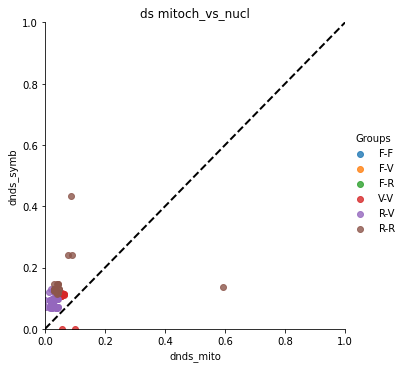

In [98]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
# Create scatter plot
sns.lmplot(x='dnds_mito', y='dnds_symb',hue='Groups',fit_reg=False,data=dnds)

# add trend line
xmin,xmax=0,1
ymin,ymax=0,1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('ds mitoch_vs_nucl')

Text(0.5, 1.0, 'ds mitoch_vs_nucl')

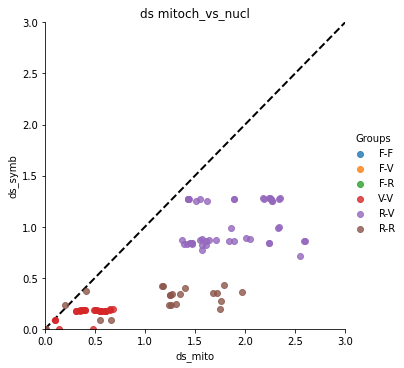

In [99]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
# Create scatter plot
sns.lmplot(x='ds_mito', y='ds_symb',hue='Groups',fit_reg=False,data=dnds)

# add trend line
xmin,xmax=0,3
ymin,ymax=0,3
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('ds mitoch_vs_nucl')

Text(0.5, 1.0, 'mitoch dnds vs ds')

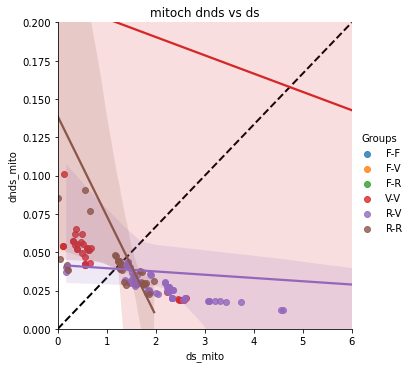

In [106]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
# Create scatter plot
sns.lmplot(x='ds_mito', y='dnds_mito',hue='Groups',fit_reg=True,data=ml_dnds)

# add trend line
xmin,xmax=0,6
ymin,ymax=0,0.2
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('mitoch dnds vs ds')

Text(0.5, 1.0, 'symb dnds vs ds')

<Figure size 1000x600 with 0 Axes>

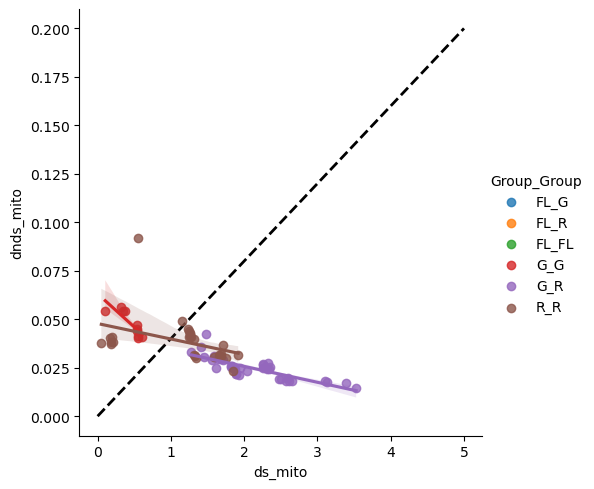

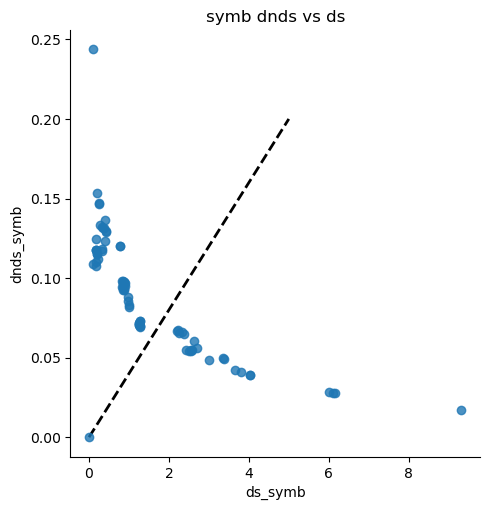

In [147]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
# add trend line
xmin,xmax=0,5
ymin,ymax=0,0.2

# # Create scatter plot
sns.lmplot(x='ds_mito', y='dnds_mito',hue='Group_Group',fit_reg=True,data=ml_dnds)
plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)
sns.lmplot(x='ds_symb',y='dnds_symb',fit_reg=False,data=ml_dnds)



plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('symb dnds vs ds')

In [107]:
dnds[['ds_symb','dnds_symb','Groups']].dropna()

,ds_symb,dnds_symb,Groups
Bathy-SUP05,2.701645,0.055494,F-F
Bathy-diagonalis,6.088162,0.027825,F-V
Bathy-extenta,6.085860,0.027849,F-V
Bathy-fausta,2.288715,0.065575,F-R
Bathy-gigas1,5.747205,0.029509,F-V
...,...,...,...
rectimargo-soyoae1,0.839376,0.097216,R-V
rectimargo-soyoae2,0.839381,0.097104,R-V
southwardae-soyoae1,0.822741,0.094897,R-V
southwardae-soyoae2,0.822477,0.094809,R-V


# Sqr

In [2]:
from Bio.Data.CodonTable import generic_by_id,unambiguous_dna_by_id

path_to_files='../mauve_alignments/'
path_out="/home/maeperez/projects/def-bacc/maeperez/Clams/VesicSymb_Evolution/dowstream_analyses_and_data/"
gene_name='sqr'


table11=unambiguous_dna_by_id[11]
table11.nucleotide_alphabet=IUPAC.ambiguous_dna
table11.protein_alphabet=IUPAC.extended_protein
table11.forward_table['GCK'] = "A"
table11.forward_table['GGY'] = "G"
table11.forward_table['ACY'] = "T"
table11.forward_table['ATY'] = "I"
table11.forward_table['ACR'] = "T"

t11=get_codon_alphabet(table11, gap_char="-")
### Get alignment
align = AlignIO.read(path_to_files+'fna/aligned_'+gene_name+'.fna', "fasta")
codon_aln=codonalign.CodonAlignment.from_msa(align,alphabet=t11)

### get dnds

mat=codon_aln.get_dn_ds_matrix(method="ML",codon_table=table11)
dN=DistanceMatrix(mat[0]).condensed_form()
dS=DistanceMatrix(mat[1]).condensed_form()
dNdS=dN/dS

### Create df
# ids=['-'.join(sorted([dic_sym[comb[0]],dic_sym[comb[1]]])) for comb in itertools.combinations(range(len(cat_aln_symb)), 2)]
# df_sym=pd.DataFrame({'dnds_symb':dNdS,'ds_symb':dS, 'dn_symb': dN}, index=ids)
# df_sym

In [3]:
sqr1=["MS2017_2127","SP60_03800","Rmag_1053","Rpac_peg_860","Rpha_peg_916","Rpli_peg_1108","Rrec_peg_666","Rsou_peg_1601","Vdia_peg_1009","Vext_peg_996","COSY_0953","Vgig2_peg_983","Vsoy2_peg_206","HUE58_RS05470","Vgig1_peg_984","Vsoy1_peg_992","Vdia_peg_1017","Vext_peg_997","Vgig2_peg_984", "Vmar_0957","Vmar_0958","Vgig1_peg_985","Vsoy1_peg_1"]
sqr6=["MS2017_1667","SP60_01550","Rmag_0824","Vgig1_peg_768","Vsoy1_peg_787","Vmar_0760","Rpac_peg_570","Rpha_peg_1560","Rpli_peg_757","Rrec_peg_358","Rsou_peg_1256","Vdia_peg_204","Vext_peg_199","COSY_0750","Vgig2_peg_657","Vsoy2_peg_3","HUE58_RS04055"]
dic_gene=dict(zip(sqr1,['sqr1' for i in range(len(sqr1))]))
dic_gene.update(dict(zip(sqr6,['sqr6' for i in range(len(sqr6))])))
dic_gene

dic_sym2=dict(zip([i for i in range(len(align))],['|'.join([seq.id.split('|')[0],dic_gene[seq.id.split('|')[1]]]) for seq in align]))
dic_sym2
dic_sym=dict(zip([i for i in range(len(align))],['|'.join([seq.id.split('|')[0],seq.id.split('|')[1]]) for seq in align]))
dic_sym

{0: 'Bathy|MS2017_1667',
 1: 'Bathy|MS2017_2127',
 2: 'R.fausta|HUE58_RS04055',
 3: 'R.fausta|HUE58_RS05470',
 4: 'R.magnifica|Rmag_0824',
 5: 'R.magnifica|Rmag_1053',
 6: 'R.pacifica|Rpac_peg_570',
 7: 'R.pacifica|Rpac_peg_860',
 8: 'R.phaseoliformis|Rpha_peg_1560',
 9: 'R.phaseoliformis|Rpha_peg_916',
 10: 'R.pliocardia|Rpli_peg_1108',
 11: 'R.pliocardia|Rpli_peg_757',
 12: 'R.rectimargo|Rrec_peg_358',
 13: 'R.rectimargo|Rrec_peg_666',
 14: 'R.southwardae|Rsou_peg_1256',
 15: 'R.southwardae|Rsou_peg_1601',
 16: 'SUP05|SP60_01550',
 17: 'SUP05|SP60_03800',
 18: 'V.diagonalis|Vdia_peg_1009',
 19: 'V.diagonalis|Vdia_peg_1017',
 20: 'V.diagonalis|Vdia_peg_204',
 21: 'V.extenta|Vext_peg_199',
 22: 'V.extenta|Vext_peg_996',
 23: 'V.extenta|Vext_peg_997',
 24: 'V.gigas1|Vgig1_peg_768',
 25: 'V.gigas1|Vgig1_peg_984',
 26: 'V.gigas1|Vgig1_peg_985',
 27: 'V.gigas2|Vgig2_peg_657',
 28: 'V.gigas2|Vgig2_peg_983',
 29: 'V.gigas2|Vgig2_peg_984',
 30: 'V.marissinica|Vmar_0760',
 31: 'V.marissinica|V

In [4]:
print(len(dS),len(ids))

NameError: name 'ids' is not defined

In [9]:
### Create df
ids=['-'.join([dic_sym[comb[0]],dic_sym[comb[1]]])  for comb in itertools.combinations(range(len(align)), 2)]
GenomeGenePair=['-'.join([dic_sym2[comb[0]],dic_sym2[comb[1]]])  for comb in itertools.combinations(range(len(align)), 2)]

# ids=['-'.join(sorted(['_'.join([dic_sym[comb[0]].split('|')[0],dic_gene[dic_sym[comb[0]].split('|')[1]]]),'_'.join([dic_sym[comb[1]].split('|')[0],dic_gene[dic_sym[comb[1]].split('|')[0]]])])) for comb in itertools.combinations(range(len(align)), 2)]
df_sym=pd.DataFrame({'dnds':dNdS,'ds':dS, 'dn': dN,'GenomeGenePair':GenomeGenePair}, index=ids)
df_sym

,dnds,ds,dn,GenomeGenePair
Bathy|MS2017_1667-Bathy|MS2017_2127,0.046869,1.922506e+01,9.010626e-01,Bathy|sqr6-Bathy|sqr1
Bathy|MS2017_1667-R.fausta|HUE58_RS04055,0.105519,1.380087e+00,1.456254e-01,Bathy|sqr6-R.fausta|sqr6
Bathy|MS2017_1667-R.fausta|HUE58_RS05470,0.047483,1.925657e+01,9.143651e-01,Bathy|sqr6-R.fausta|sqr1
Bathy|MS2017_1667-R.magnifica|Rmag_0824,0.104720,1.528896e+00,1.601058e-01,Bathy|sqr6-R.magnifica|sqr6
Bathy|MS2017_1667-R.magnifica|Rmag_1053,0.046324,1.973834e+01,9.143665e-01,Bathy|sqr6-R.magnifica|sqr1
...,...,...,...,...
V.soyoae1|Vsoy1_peg_787-V.soyoae2|Vsoy2_peg_206,0.031135,2.707558e+01,8.430043e-01,V.soyoae1|sqr6-V.soyoae2|sqr1
V.soyoae1|Vsoy1_peg_787-V.soyoae2|Vsoy2_peg_3,1.787428,1.999949e-11,3.574765e-11,V.soyoae1|sqr6-V.soyoae2|sqr6
V.soyoae1|Vsoy1_peg_992-V.soyoae2|Vsoy2_peg_206,1.514603,2.333134e-11,3.533771e-11,V.soyoae1|sqr1-V.soyoae2|sqr1
V.soyoae1|Vsoy1_peg_992-V.soyoae2|Vsoy2_peg_3,0.031135,2.707532e+01,8.429895e-01,V.soyoae1|sqr1-V.soyoae2|sqr6


In [10]:
genomes=sorted(list(set(list([v.split('-')[0].split('|')[0] for v in df_sym.index.values]))))
print(genomes)
dic_group=dict(zip(genomes,['F','R','R','R','R','R','R','R','F','V','V','V','V','V','V','V','V']))


df_sym['Groups']=['-'.join([dic_group[i.split('-')[0].split('|')[0]],dic_group[i.split('-')[1].split('|')[0]]]) for i in df_sym.index.values]
df_sym

comp=[]
for rowname in df_sym.GenomeGenePair.values:
    pair=[side.split('|') for side in rowname.split('-')]
#     print(pair)
    if pair[0][1]!=pair[1][1]:
        comp+=['intergene']
    else:
        comp+=[pair[0][1]]

df_sym["GenePair"] = comp
df_sym['GenomePair']=['-'.join([i.split('-')[0].split('|')[0],i.split('-')[1].split('|')[0]]) for i in df_sym.index]
df_sym['idx']=df_sym.index
# df=pd.crosstab(index=[df_sym.index,df_sym['Groups']], columns=[df_sym['GenePair']]) 
# df
df_sym

['Bathy', 'R.fausta', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis', 'R.pliocardia', 'R.rectimargo', 'R.southwardae', 'SUP05', 'V.diagonalis', 'V.extenta', 'V.gigas1', 'V.gigas2', 'V.marissinica', 'V.okutanii', 'V.soyoae1', 'V.soyoae2']


,dnds,ds,dn,GenomeGenePair,Groups,GenePair,GenomePair,idx
Bathy|MS2017_1667-Bathy|MS2017_2127,0.046869,1.922506e+01,9.010626e-01,Bathy|sqr6-Bathy|sqr1,F-F,intergene,Bathy-Bathy,Bathy|MS2017_1667-Bathy|MS2017_2127
Bathy|MS2017_1667-R.fausta|HUE58_RS04055,0.105519,1.380087e+00,1.456254e-01,Bathy|sqr6-R.fausta|sqr6,F-R,sqr6,Bathy-R.fausta,Bathy|MS2017_1667-R.fausta|HUE58_RS04055
Bathy|MS2017_1667-R.fausta|HUE58_RS05470,0.047483,1.925657e+01,9.143651e-01,Bathy|sqr6-R.fausta|sqr1,F-R,intergene,Bathy-R.fausta,Bathy|MS2017_1667-R.fausta|HUE58_RS05470
Bathy|MS2017_1667-R.magnifica|Rmag_0824,0.104720,1.528896e+00,1.601058e-01,Bathy|sqr6-R.magnifica|sqr6,F-R,sqr6,Bathy-R.magnifica,Bathy|MS2017_1667-R.magnifica|Rmag_0824
Bathy|MS2017_1667-R.magnifica|Rmag_1053,0.046324,1.973834e+01,9.143665e-01,Bathy|sqr6-R.magnifica|sqr1,F-R,intergene,Bathy-R.magnifica,Bathy|MS2017_1667-R.magnifica|Rmag_1053
...,...,...,...,...,...,...,...,...
V.soyoae1|Vsoy1_peg_787-V.soyoae2|Vsoy2_peg_206,0.031135,2.707558e+01,8.430043e-01,V.soyoae1|sqr6-V.soyoae2|sqr1,V-V,intergene,V.soyoae1-V.soyoae2,V.soyoae1|Vsoy1_peg_787-V.soyoae2|Vsoy2_peg_206
V.soyoae1|Vsoy1_peg_787-V.soyoae2|Vsoy2_peg_3,1.787428,1.999949e-11,3.574765e-11,V.soyoae1|sqr6-V.soyoae2|sqr6,V-V,sqr6,V.soyoae1-V.soyoae2,V.soyoae1|Vsoy1_peg_787-V.soyoae2|Vsoy2_peg_3
V.soyoae1|Vsoy1_peg_992-V.soyoae2|Vsoy2_peg_206,1.514603,2.333134e-11,3.533771e-11,V.soyoae1|sqr1-V.soyoae2|sqr1,V-V,sqr1,V.soyoae1-V.soyoae2,V.soyoae1|Vsoy1_peg_992-V.soyoae2|Vsoy2_peg_206
V.soyoae1|Vsoy1_peg_992-V.soyoae2|Vsoy2_peg_3,0.031135,2.707532e+01,8.429895e-01,V.soyoae1|sqr1-V.soyoae2|sqr6,V-V,intergene,V.soyoae1-V.soyoae2,V.soyoae1|Vsoy1_peg_992-V.soyoae2|Vsoy2_peg_3


In [12]:
df = df_sym.pivot_table(index='GenomePair', columns='GenePair', values=['dnds','ds','dn'],aggfunc='mean')
df=df.iloc[:,df.columns.get_level_values(1) != 'intergene']

df.columns=['_'.join(col).strip() for col in df.columns.values]
df['Groups']=['-'.join(sorted([dic_group[i.split('-')[0]],dic_group[i.split('-')[1]]])) for i in df.index.values]

df=df.dropna()
df
# df.loc[[df.index.str.contains('soyoae2') and df.index.str.contains('okutanii')]]
df.to_csv(path_out+'SqrIvsSqrVI_results.txt',header=True,index=True,sep='\t')

In [ ]:
df=read.csv(path_out+'SqrIvsSqrVI_results.txt',header=0,index_col=0,sep='\t')

Text(0.5, 1.0, 'dnds sqr1_vs_sqr2')

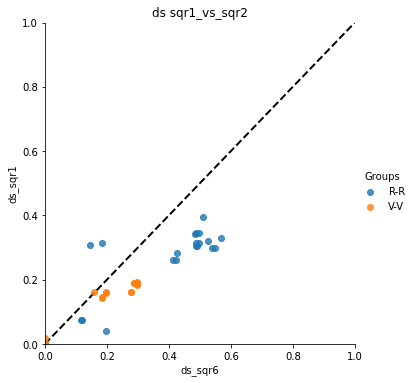

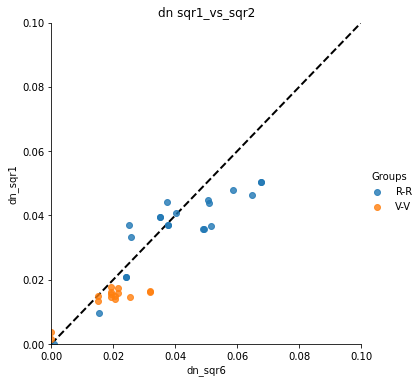

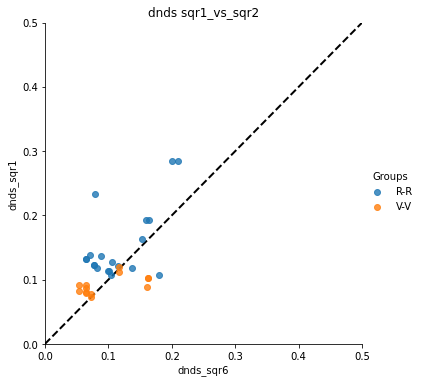

In [158]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
searchfor = ['soyoae2', 'okutanii']
df2 = df[~df.index.str.contains('|'.join(searchfor))]
# Create scatter plot
sns.lmplot(x='ds_sqr6', y='ds_sqr1',hue='Groups',fit_reg=False,data=df2.loc[df['Groups'].isin(['V-V','R-R'])]
)

# add trend line
xmin,xmax=0,1
ymin,ymax=0,1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('ds sqr1_vs_sqr2')
###################

# Create scatter plot
sns.lmplot(x='dn_sqr6', y='dn_sqr1',hue='Groups',fit_reg=False,data=df2.loc[df['Groups'].isin(['V-V','R-R'])]
)

# add trend line
xmin,xmax=0,0.1
ymin,ymax=0,0.1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('dn sqr1_vs_sqr2')
##############

# Create scatter plot
sns.lmplot(x='dnds_sqr6', y='dnds_sqr1',hue='Groups',fit_reg=False,data=df2.loc[df['Groups'].isin(['V-V','R-R'])]
)
# add trend line
xmin,xmax=0,0.5
ymin,ymax=0,0.5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('dnds sqr1_vs_sqr2')

Text(0.5, 1.0, 'dnds sqr1_vs_sqr2')

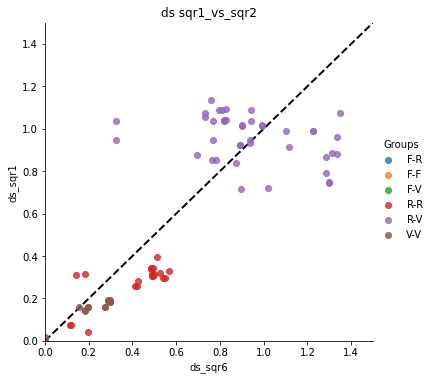

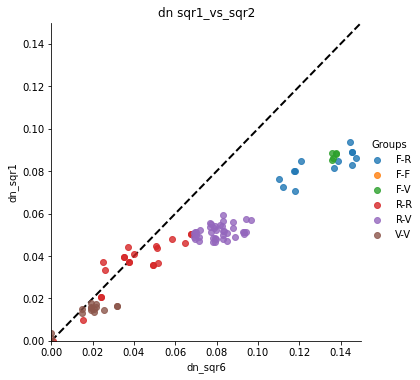

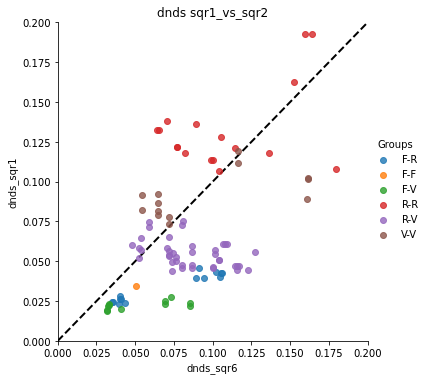

In [182]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
searchfor = ['soyoae2', 'okutanii']
df2 = df[~df.index.str.contains('|'.join(searchfor))]
# Create scatter plot
sns.lmplot(x='ds_sqr6', y='ds_sqr1',hue='Groups',fit_reg=False,data=df2
)
# plt.scatter(x=df[df.index.str.contains('|'.join(searchfor))]['ds_sqr6'], y=df[df.index.str.contains('|'.join(searchfor))]['ds_sqr1'],color='black')

# add trend line
xmin,xmax=0,1.5
ymin,ymax=0,1.5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('ds sqr1_vs_sqr2')
###################

# Create scatter plot
sns.lmplot(x='dn_sqr6', y='dn_sqr1',hue='Groups',fit_reg=False,data=df2)
# plt.scatter(x=df[df.index.str.contains('|'.join(searchfor))]['dn_sqr6'], y=df[df.index.str.contains('|'.join(searchfor))]['dn_sqr1'],color='black')

# add trend line
xmin,xmax=0,0.15
ymin,ymax=0,0.15
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('dn sqr1_vs_sqr2')
##############

# Create scatter plot
sns.lmplot(x='dnds_sqr6', y='dnds_sqr1',hue='Groups',fit_reg=False,data=df2
)
# plt.scatter(x=df[df.index.str.contains('|'.join(searchfor))]['dnds_sqr6'], y=df[df.index.str.contains('|'.join(searchfor))]['dnds_sqr1'],color='black')

# add trend line
xmin,xmax=0,0.2
ymin,ymax=0,0.2
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('dnds sqr1_vs_sqr2')

/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a

Text(0.5, 1.0, 'dnds sqr1/6')

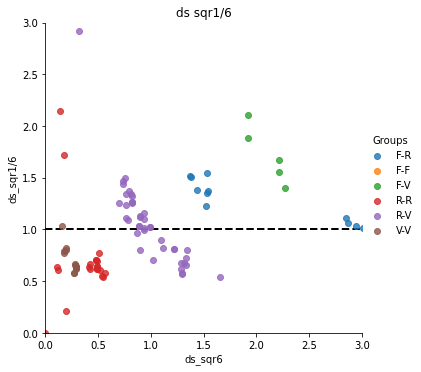

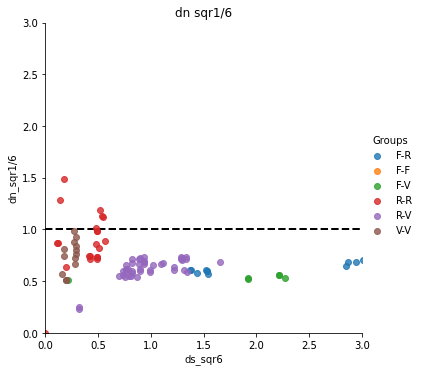

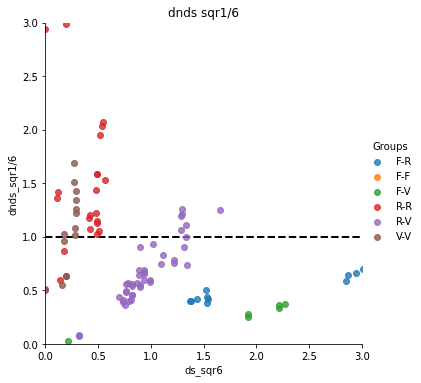

In [14]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
searchfor = ['soyoae2', 'okutanii']
df2 = df[~df.index.str.contains('|'.join(searchfor))]
df2['ds_sqr1/6']=df2['ds_sqr1']/df2['ds_sqr6']
df2['dn_sqr1/6']=df2['dn_sqr1']/df2['dn_sqr6']
df2['dnds_sqr1/6']=df2['dnds_sqr1']/df2['dnds_sqr6']

# Create scatter plot
sns.lmplot(y='ds_sqr1/6', x='ds_sqr6',hue='Groups',fit_reg=False,data=df2
)

# add trend line
xmin,xmax=0,3
ymin,ymax=0,3
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[1,1],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('ds sqr1/6')
################

# Create scatter plot
sns.lmplot(y='dn_sqr1/6', x='ds_sqr6',hue='Groups',fit_reg=False,data=df2
)

# add trend line
xmin,xmax=0,3
ymin,ymax=0,3
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[1,1],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('dn sqr1/6')

################

# Create scatter plot
sns.lmplot(y='dnds_sqr1/6', x='ds_sqr6',hue='Groups',fit_reg=False,data=df2
)

# add trend line
xmin,xmax=0,3
ymin,ymax=0,3
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[1,1],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('dnds sqr1/6')
